# Car Price Prediction using LinearRegression

In [3]:
# https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [6]:
car_dataset = pd.read_csv('car data.csv')
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
car_dataset.shape

(301, 9)

In [15]:
car_dataset.info()  # get some information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
car_dataset.isnull().sum()  # no need to preprocessing the data

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [23]:
# check distribution of categorical dataset
car_dataset.Fuel_Type.value_counts()   # car_dataset['Fuel_Type'].value_counts()


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [25]:
print(car_dataset.Fuel_Type.value_counts())    # distribution data
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [29]:
# Encoding the categorical data 0 & 1

# encoding "Fuel_Type" columns
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, "CNG": 2}}, inplace = True)

# encoding "Seller_Type" columns
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True)

# encoding "Transmissione" columns
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [30]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Split data and Target Data

In [37]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis =1)  # car_name is not usfull for our model
y = car_dataset['Selling_Price']

In [39]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


## Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (270, 7)
Shape of y_train =  (270,)
Shape of X_test =  (31, 7)
Shape of y_test =  (31,)


## 1. Linear Regression - ML Model Training

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)  # fit the data

LinearRegression()

### Model Evaluation

In [46]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [49]:
# R sqaured error
error_score = metrics.r2_score(y_train, training_data_prediction)
error_score    

0.8799451660493698

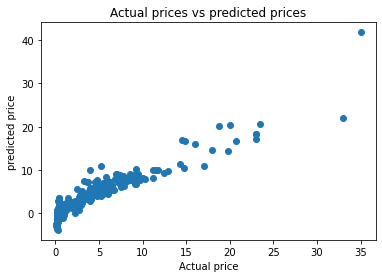

In [52]:
# Visulizationn the actual price and prediction
import matplotlib.pyplot as plt
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
plt.show()

In [55]:
# prediction on testing data
testing_data_prediction = lin_reg_model.predict(X_test)

In [56]:
# R sqaured error
error_score = metrics.r2_score(y_test, testing_data_prediction)
error_score 

0.8365766715026903

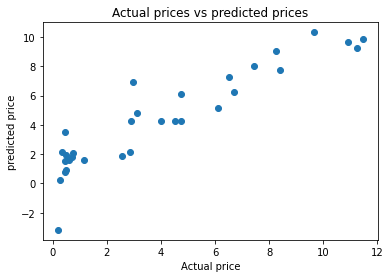

In [57]:
# Visulizationn the actual price and prediction
import matplotlib.pyplot as plt
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
plt.show()

In [58]:
lin_reg_model.score(X_test, y_test)  # Accuracy od our model

0.8365766715026903

## 2.Lasso Regression

In [59]:
lass_reg_model = Lasso()
lass_reg_model.fit(X_train, y_train)

Lasso()

In [60]:
# prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [61]:
# R sqaured error
error_score = metrics.r2_score(y_train, training_data_prediction)
error_score    

0.8427856123435794

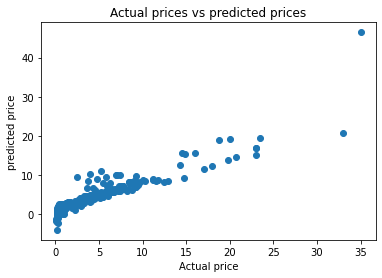

In [62]:
# Visulizationn the actual price and prediction
import matplotlib.pyplot as plt
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
plt.show()

In [63]:
# prediction on testing data
testing_data_prediction = lass_reg_model.predict(X_test)

In [65]:
# R sqaured error
error_score = metrics.r2_score(y_test, testing_data_prediction)
error_score 

0.8709167941173195

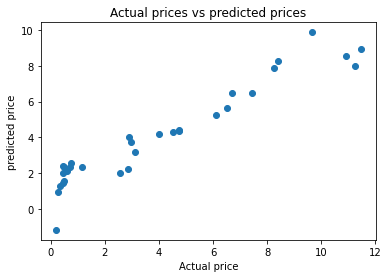

In [66]:
# Visulizationn the actual price and prediction
import matplotlib.pyplot as plt
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
plt.show()